<a href="https://colab.research.google.com/github/radmehr33/AItutor/blob/main/sattelite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np


In [5]:
def preprocess_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to enhance contrast
    equalized = cv2.equalizeHist(gray)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

    return blurred


In [6]:
def detect_clouds(image):
    # Apply adaptive thresholding to segment cloud pixels
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary


In [7]:
def detect_land_sea(image):
    # Apply global thresholding to separate land and sea/ocean pixels
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Perform morphological operations to remove noise and smooth the masks
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=3)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=2)

    # Separate land and sea/ocean masks
    land_mask = opened.copy()
    sea_mask = cv2.bitwise_not(opened)

    return land_mask, sea_mask

In [8]:
def detect_fog(image):
    # Calculate the Laplacian of the image to emphasize edges
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Apply a threshold to detect foggy regions based on low gradients
    _, binary = cv2.threshold(laplacian, 40, 255, cv2.THRESH_BINARY)

    return binary

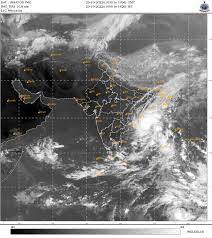

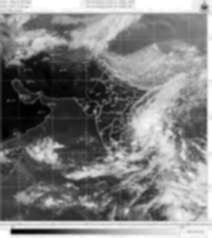

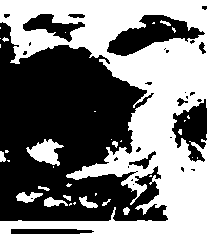

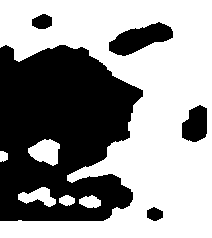

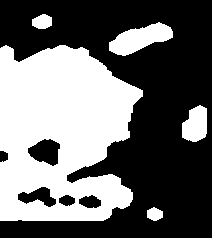

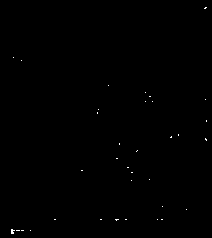

Cloud Coverage: 49.47082606627557%
Fog Coverage: 0.1565720627873791%
Land Percentage: 58.61542730299667%
Sea/Ocean Percentage: 41.38457269700333%


In [11]:
from google.colab.patches import cv2_imshow

image_path = '/content/download.jpeg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Failed to load image from {image_path}")
    exit()

# Preprocess the image
preprocessed_image = preprocess_image(image)

# Detect clouds
cloud_mask = detect_clouds(preprocessed_image)

# Detect land and sea/ocean
land_mask, sea_mask = detect_land_sea(preprocessed_image)

# Detect fog
fog_mask = detect_fog(preprocessed_image)

# Estimate atmospheric motion

# Check if the previous image was loaded successfully

# Perform analysis and interpretation
cloud_percentage = np.count_nonzero(cloud_mask) / (cloud_mask.shape[0] * cloud_mask.shape[1]) * 100
fog_percentage = np.count_nonzero(fog_mask) / (fog_mask.shape[0] * fog_mask.shape[1]) * 100
land_percentage = np.count_nonzero(land_mask) / (land_mask.shape[0] * land_mask.shape[1]) * 100
sea_percentage = np.count_nonzero(sea_mask) / (sea_mask.shape[0] * sea_mask.shape[1]) * 100

# Visualization
# You can use OpenCV functions to overlay annotations or generate maps based on the analyzed data

# Display the processed image and results
cv2_imshow(image)
cv2_imshow(preprocessed_image)
cv2_imshow(cloud_mask)
cv2_imshow(land_mask)
cv2_imshow(sea_mask)
cv2_imshow(fog_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the analyzed data
print(f"Cloud Coverage: {cloud_percentage}%")
print(f"Fog Coverage: {fog_percentage}%")
print(f"Land Percentage: {land_percentage}%")
print(f"Sea/Ocean Percentage: {sea_percentage}%")
